# Hierarchial Clustering
--- 
Agglomerative approach : going from bottom to top i.e., merging small clusters into larger ones into finally a single cluster

In [37]:
# using sklearn==0.18.2 and scipy==1.2.3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

data_set = pd.read_csv('mall.csv')

data_set.info()
data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## clustering the customers based on their Annual Income &	Spending Score (1-100)

In [38]:
X = data_set.iloc[:,[3,4]].values

## HC part [dendrogram]

In [39]:
import scipy.cluster.hierarchy as sch

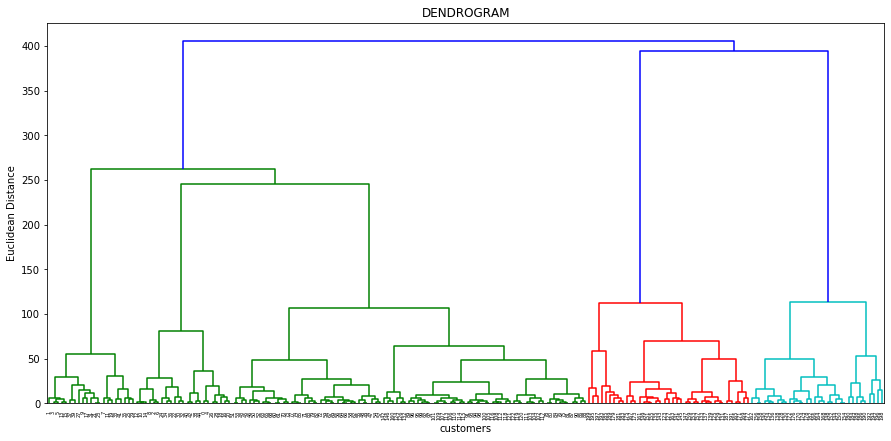

In [40]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) #ward is minimising variance within clusters
plt.title('DENDROGRAM')
plt.xlabel('customers')
plt.ylabel('Euclidean Distance')
plt.rcParams['figure.figsize'] = [15,7]
plt.show()

## Fit & predict using HC

In [44]:
from sklearn.cluster import AgglomerativeClustering as agcl
# if we select threshold distance 150 in the dendrogram then there are 5 clusters so n_clusters should be 5
hc = agcl(n_clusters = 5, affinity = 'euclidean' , linkage = 'ward')

In [42]:
y_hc = hc.fit_predict(X)

## visulaizing 'em all

Text(0, 0.5, "customer's spending score")

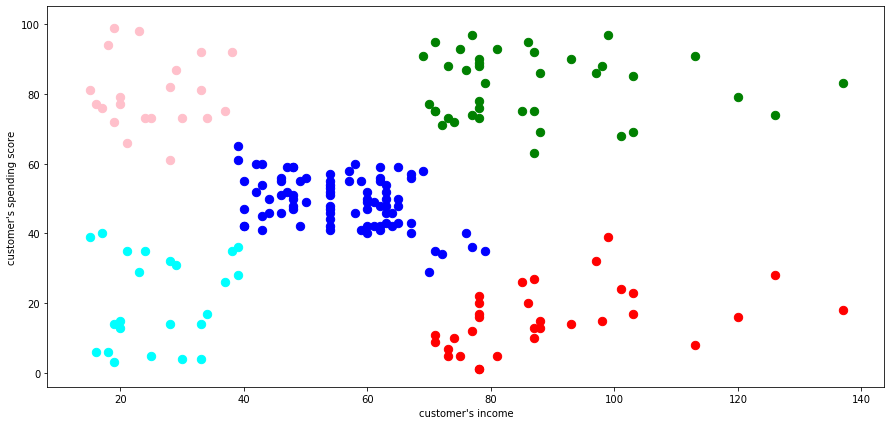

In [43]:
plt.scatter(X[y_hc == 0,0],X[y_hc == 0,1],s=70,c= 'red',  label = 'Cluster 1')
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1],s=70,c= 'blue',  label = 'Cluster 2')
plt.scatter(X[y_hc == 2,0],X[y_hc == 2,1],s=70,c= 'green',  label = 'Cluster 3')
plt.scatter(X[y_hc == 3,0],X[y_hc == 3,1],s=70,c= 'pink',  label = 'Cluster 4')
plt.scatter(X[y_hc == 4,0],X[y_hc == 4,1],s=70,c= 'cyan',  label = 'Cluster 5')
plt.xlabel("customer's income")
plt.ylabel("customer's spending score")

## Conclusion:
#### cluster 1: high income - low spending score: careful
#### cluster 2: moderate income - moderate spending score: standard
### cluster 3: high income - high spending score: potential target for the company
#### cluster 4: low income - high spending score: careless
#### cluster 5: low income - low spending score: sensible